<a href="https://colab.research.google.com/github/KhanShaheb34/MachineLearning-Lab/blob/master/ML02%3A%20Logistic%20Regression%20Regularized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! gdown 1lM7HpS2p7BmgdjdBdDv6UITYAoJ-TqjS

Downloading...
From: https://drive.google.com/uc?id=1lM7HpS2p7BmgdjdBdDv6UITYAoJ-TqjS
To: /content/data2.txt
100% 2.35k/2.35k [00:00<00:00, 4.23MB/s]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
from scipy import optimize
from scipy.special import expit
import copy
import math

In [3]:
data = pd.read_csv('data2.txt', header=None, names = ["x1","x2","y"])
data.shape

(118, 3)

In [4]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
  neg = data['y'] == 0
  pos = data['y'] == 1
  
  if axes == None:
      axes = plt.gca()
  axes.scatter(data[pos]['x1'], data[pos]['x2'], marker='+', c='red', label=label_pos)
  axes.scatter(data[neg]['x1'], data[neg]['x2'], marker='x', c='blue', label=label_neg)
  axes.set_xlabel(label_x)
  axes.set_ylabel(label_y)
  axes.legend(frameon= True, fancybox = True);

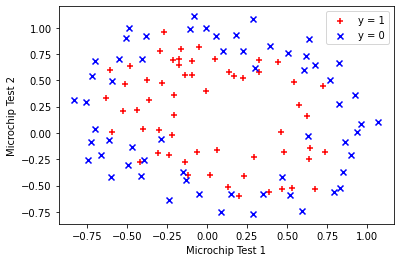

In [5]:
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [6]:
n = data.shape[1]-1
x = data[data.columns[0:n]]
y = data[data.columns[n:n+1]]

X = x.values
y = y.values

In [8]:
def mapFeature(x1col, x2col):
  """
  take in numpy array of x1 and x2, return all polynomial terms up to the given degree
  """
  degrees = 5
  out = np.ones( (x1col.shape[0], 1) )

  for i in range(1, degrees+1):
    for j in range(0, i+1):
      term1 = x1col ** (i-j)
      term2 = x2col ** (j)
      term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
      out   = np.hstack(( out, term ))
  return out

In [9]:
XX = mapFeature(X[:,0],X[:,1])
print(X.shape, XX.shape)

(118, 2) (118, 21)


In [10]:
def h(theta,X):
  """
  Take in numpy array of theta and X to return prediction
  """
  return expit(np.dot(X,theta))

In [11]:
def computeCost(theta,X,Y,Lambda = 0.): 
  """
  Take in numpy array of theta, X, and y to return the cost
  """
  m = Y.size

  term1 = np.dot(-np.array(Y).T,np.log(h(theta,X)))
  term2 = np.dot((1-np.array(Y)).T,np.log(1-h(theta,X)))
  regterm = (Lambda/2) * np.sum(np.dot(theta[1:].T,theta[1:]))
  return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )

In [12]:
def sigmoid(z):
  """
  return the sigmoid of z
  """
  z = np.clip( z, -500, 500 )
  g = 1.0/(1.0+np.exp(-z))
  return g

In [13]:
def compute_gradient_logistic(X, y, w):
  """
  Take in numpy array of X, and y to return the gradient of logistic regression
  """
  m,n = X.shape
  dj_dw = np.zeros((n,))

  for i in range(m):
    f_wb_i = sigmoid(np.dot(X[i], w))
    err_i  = f_wb_i  - y[i]
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err_i * X[i,j]
  dj_dw = dj_dw/m
      
  return dj_dw

In [14]:
initial_theta = np.zeros(XX.shape[1])

def optimizeRegularizedTheta(mytheta, myX, myy, alpha, num_iters, mylambda=0.):
  # result = optimize.minimize(computeCost, mytheta, args=(myX, myy, mylambda),  method='BFGS', options={"maxiter":500, "disp":False} )
  # return np.array([result.x]), result.fun
  m = myX.shape[0]
  J_history = []
  w = copy.deepcopy(mytheta)

  for i in range(num_iters):
    dj_dw = compute_gradient_logistic(myX, myy, w)
    w = w*(1-alpha*(mylambda/m)) - alpha * dj_dw
    if i<100000:
        J_history.append( computeCost(w, myX, myy, mylambda) )
    if i% math.ceil(num_iters / 10) == 0:
        print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
  return w, min(J_history)
    
theta, mincost = optimizeRegularizedTheta(initial_theta,XX,y, 0.1, 100)
print(theta.shape)
print(mincost)

Iteration    0: Cost 0.6921299029666927   
Iteration   10: Cost 0.6831234062907214   
Iteration   20: Cost 0.675591704296431   
Iteration   30: Cost 0.6689637052199219   
Iteration   40: Cost 0.6629354480483678   
Iteration   50: Cost 0.6573390803567676   
Iteration   60: Cost 0.6520767845054817   
Iteration   70: Cost 0.6470875634750806   
Iteration   80: Cost 0.6423304541357095   
Iteration   90: Cost 0.6377759343820374   
(21,)
0.6338313229985428


In [15]:
def plotBoundary(mytheta, myX, myy, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    alpha = .1
    iters = 1000

    theta, mincost = optimizeRegularizedTheta(mytheta, myX, myy, alpha, iters, mylambda)
    print(theta, '\n\nCost : ', mincost, '\n \n ')
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
            # print(type(zvals), zvals.shape)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

Iteration    0: Cost 0.6921299029666927   
Iteration  100: Cost 0.633401430861966   
Iteration  200: Cost 0.5966963943327046   
Iteration  300: Cost 0.568226224890868   
Iteration  400: Cost 0.5449969827631354   
Iteration  500: Cost 0.525601082747507   
Iteration  600: Cost 0.5091587076112433   
Iteration  700: Cost 0.4950498744438343   
Iteration  800: Cost 0.4828166092641242   
Iteration  900: Cost 0.47211241417058086   
[ 1.30117192  0.66830571  1.35460211 -2.33005636 -0.88962476 -1.46545182
  0.01300396 -0.38460746 -0.35823033 -0.38670362 -1.82880647 -0.07975466
 -0.67251363 -0.24086405 -1.57075739 -0.42225622 -0.24301883 -0.0756799
 -0.30308355 -0.28319741 -0.88774278] 

Cost :  0.46275952390605135 
 
 
Iteration    0: Cost 0.69213033368768   
Iteration  100: Cost 0.6374908756050383   
Iteration  200: Cost 0.6085786033780137   
Iteration  300: Cost 0.5895202422422684   
Iteration  400: Cost 0.5763219129352325   
Iteration  500: Cost 0.5669754281056993   
Iteration  600: Cost 0.56

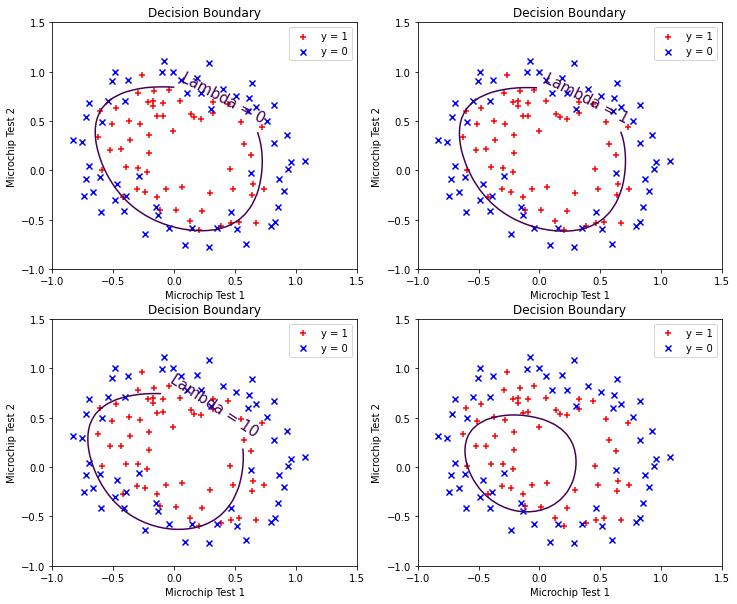

In [16]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta, XX, y, 0.)

plt.subplot(222)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,1.)

plt.subplot(223)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,10.)

plt.subplot(224)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,50.)